In [1]:
# Import resources

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2 # opencv

%matplotlib inline

(450, 660, 3)


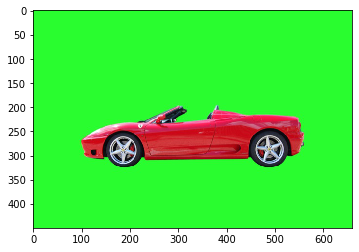

In [2]:
# Read the image
image = mpimg.imread('car_green_screen.jpg')

# Display the image dimensions (height, width, and depth (color))
print(image.shape)

#Display the image
plt.imshow(image)


(450, 660)
0


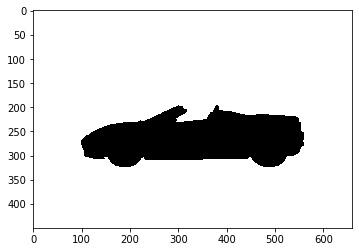

In [16]:
# Define our color selection boundaries (threshhold) in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

# Define the masked area (green pixels)
mask = cv2.inRange(image, lower_green, upper_green) # pixels in range become 0 (black), not in range become 255 (white)
#print(mask.shape)
#print(mask[250,300])
# Vizualize the mask
plt.imshow(mask, cmap='gray') #---> mono


(450, 660, 3)
(450, 660, 3)


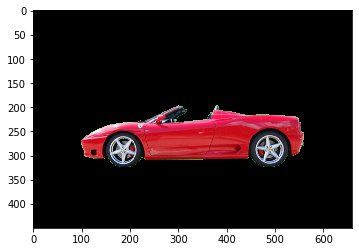

In [45]:
# Mask the image to let the car show through
masked_image = np.copy(image)
print(image.shape)
print(masked_image.shape)
#[mask != 0] returns a matrix of True and False. 
# image's pixels that correspond to mask's white (not in range) pixels are set to black (0,0,0)
masked_image[mask != 0] = [0, 0, 0] # 

# Display 
plt.imshow(masked_image)


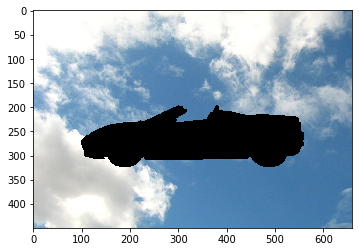

In [46]:
# Add a background 

background = mpimg.imread('sky.jpg')[:450, :660, :]
masked_background = np.copy(background)
masked_background[mask == 0] = [0, 0, 0]


plt.imshow(masked_background)


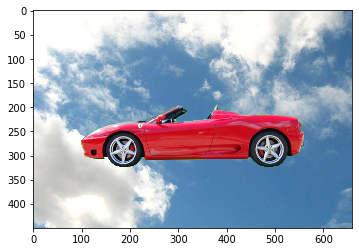

In [48]:
complete_image = masked_image + masked_background


plt.imshow(complete_image)